# Lecture 3 - Probability Distributions

## Objectives
+ Learn about some famous discrete PDFs
+ Learn about some famous continous PDFs

## Readings

+ A First Course in Probability (9th Edition) (Sheldon Ross) 

+ All of Statistics: A Concise Course in Statistical Inference (Larry A. Wasseman, 2004) 


## Discrete random variables

### Coin flipping: Heads = 1, Tails = 0 - The Bernoulli Distribution

Let $X$ be the following random variable:
$$
X = \begin{cases}
1,& \mbox{with probability}\;\theta,\\
0,& \mbox{with probability}\;1-\theta,
\end{cases}
$$
where $\theta\in[0,1]$ is the probability of getting heads (i.e., 1).
The PDF of this random variable has two values:
$$
p(X=1|\theta) = \theta,
$$
and
$$
p(X=0|\theta) = 1-\theta.
$$

The expected value is:
$$
\mathbb{E}[X|\theta] = \sum_x xp(X=x|\theta) = 1\times p(X=1|\theta) + 0\times p(X=0|\theta) = \theta.
$$

The "coin flipping" random variable is also known as a Bernoulli random
variable (or Bernoulli trial).
Typically, we write:
$$
X=x|\theta \sim \mbox{Bern}(X=x|\theta) = \theta^{x}(1-\theta)^{1-x}.$$


Let's play with this random variable using [scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html),
and specifically [scipy.stats.bernoulli](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html#scipy.stats.bernoulli).

In [6]:
# Initialize the random variable
import scipy.stats as st
X = st.bernoulli(0.25)
# Take 10 samples:
X.rvs(20)

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [7]:
# You can also compute the mean of a random variable:
X.mean()

0.25

In [8]:
# The variance
X.var()

0.1875

In [28]:
# You can evaluate the PDF anywhere you want
# (called probability mass function):
X.pmf(0.5)

0.0

In [9]:
X.pmf(0.)

0.75

In [10]:
X.pmf(1.)

0.25

C:\Users\Guang\Anaconda2\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


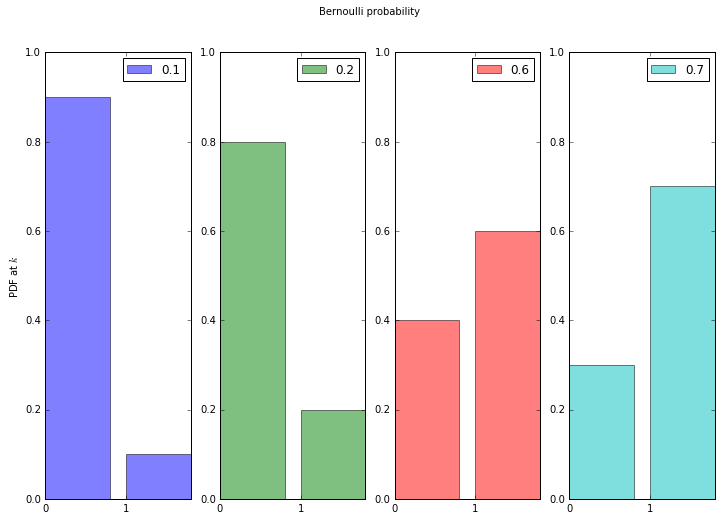

In [14]:
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import bernoulli, poisson, binom
a=bernoulli.rvs(0.6, size=100)
a = np.arange(2) # the .pmf function returns the probability given a value of p 
colors = matplotlib.rcParams['axes.color_cycle']
plt.figure(figsize=(12,8))
for i, p in enumerate([0.1, 0.2, 0.6, 0.7]):
    ax = plt.subplot(1, 4, i+1)
    plt.bar(a, bernoulli.pmf(a, p), label=p, color=colors[i], alpha=0.5)
    ax.xaxis.set_ticks(a)
    plt.ylim((0,1)) 
    plt.legend(loc=0)
    if i == 0:
        plt.ylabel("PDF at $k$")
    q=plt.suptitle("Bernoulli probability")

### N Coin Flips - The Binomial Distribution

Consider an experiment with two possible outcomes: 1 and 0 (success and faillure).
Let $\theta$ be the probability of success.
Now assume that you perform the experiment $N$ times.
Let $X$ the random variable that counts the succesfull experiments.
We say that $X$ is a Binomial random variable. Using counting arguments, one can show that the PDF of $X$ is:
$$
p(X=k|N,\theta) = \mbox{Bin}(X=k|N,\theta) = \left(\frac{N}{k}\right)\theta^k(1-\theta)^{N-k}.
$$
We can also show that the mean is
$$
\mathbb{E}[X|N,\theta] = N\theta,
$$
and that the variance is 
$$
\mathbb{V}[X|N,\theta] = N\theta(1-\theta).
$$

We can play with this using [scipy.stats.binom](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom):

In [15]:
X = st.binom(10, 0.25) # N, theta
# Take samples.
X.rvs(10)

array([2, 2, 4, 2, 3, 1, 2, 4, 3, 5])

In [16]:
# Get some statistics
mean, var, skew, kurt = X.stats(moments='mvsk')
print mean
print var
print skew
print kurt

2.5
1.875
0.36514837167
-0.0666666666667


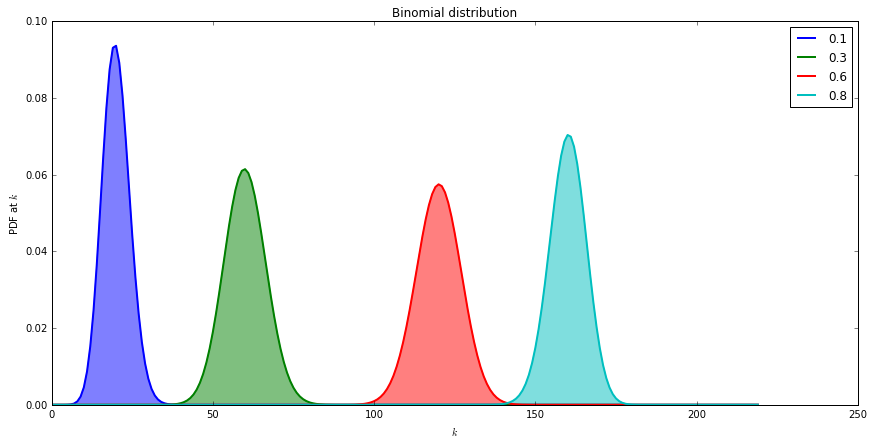

In [17]:
plt.figure(figsize=(12,6))
k = np.arange(0, 220)
for p, color in zip([0.1, 0.3, 0.6, 0.8], colors):
    rv = binom(200, p)
    plt.plot(k, rv.pmf(k), lw=2, color=color, label=p)
    plt.fill_between(k, rv.pmf(k), color=color, alpha=0.5)
q=plt.legend()
plt.title("Binomial distribution")
plt.tight_layout()
q=plt.ylabel("PDF at $k$")
q=plt.xlabel("$k$")

#### Example Binomial distribution

Probability of 8 people getting a C or higher this year assuming we have 50 students in total. In this case $p=0.75$ and $n=50$. If we assume uncorrelated events, then p(k=8; n=50, p=0.75)

(array([   3.,    8.,   54.,  111.,  200.,  250.,  221.,  104.,   41.,    8.]),
 array([ 27. ,  28.9,  30.8,  32.7,  34.6,  36.5,  38.4,  40.3,  42.2,
         44.1,  46. ]),
 <a list of 10 Patch objects>)

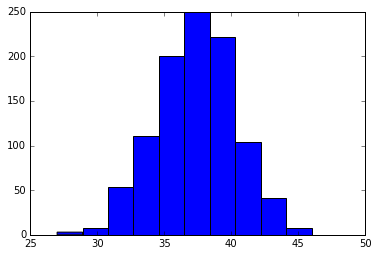

In [18]:
binom.pmf(10, 50, 0.75)
z=binom.rvs(50, 0.75, size=1000)
plt.hist(z)

Let's use the binomial we have just constructed to demonstrate yet another attribute of random variables, the **percent point function**.
The percent point function, is actually the inverse of the CDF.
For example:

In [19]:
X.ppf(0.01)

0.0

which means that with probability 0.01, X is less than 0, or

In [38]:
X.ppf(0.99)

6.0

which means that with probability 0.99, X is less than 6, or

In [39]:
X.ppf(0.5)

2.0

which means that with probability 0.5, X is less than 2.

Now, let's actually visualize the Binomial distribution:

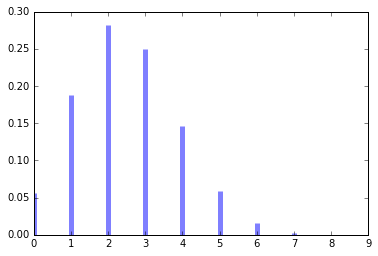

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as st
from ipywidgets import interactive
def visualize_binomial(N=10, theta=0.25):
    X = st.binom(N, theta)
    x = np.arange(0, N)
    plt.vlines(x, 0, X.pmf(x), color='b', alpha=0.5, lw=5)
    

interactive(visualize_binomial, N=(1, 100, 1), theta=(0, 1., 0.01))

## [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) 
(see also [scipy.stats.poisson](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson)), which is used to describe the number of events occuring in a fixed time interval.

Another discrete distribution, the Poisson distribution expresses the probability of a given number of events occurring in a fixed interval of time and/or space if these events occur with a known average rate and independently of the time since the last event.  Defined for all the integer positive number as,


$$ P(X=k)= \frac{\lambda^k e^{-\lambda}}{k!}, $$



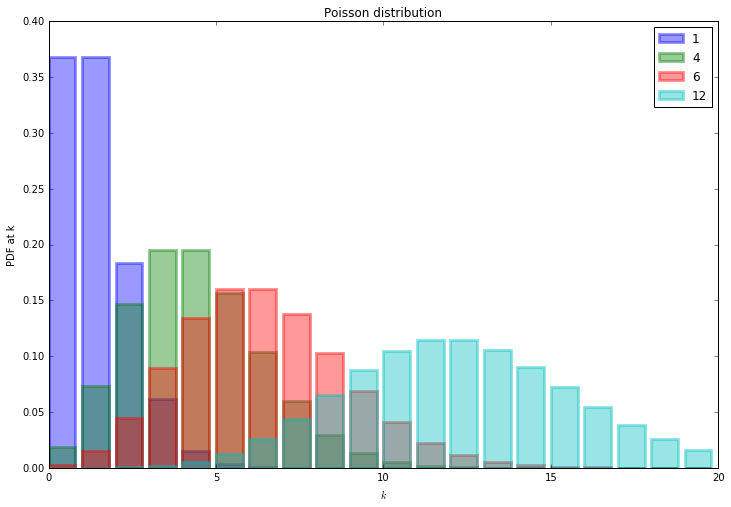

In [41]:
k = np.arange(20)
colors = matplotlib.rcParams['axes.color_cycle'] 
plt.figure(figsize=(12,8))
for i, lambda_ in enumerate([1, 4, 6, 12]):
    plt.bar(k, poisson.pmf(k, lambda_), label=lambda_, color=colors[i], alpha=0.4, edgecolor=colors[i], lw=3)
    plt.legend()
plt.title("Poisson distribution")
plt.xlabel("$k$")
plt.ylabel("PDF at k")

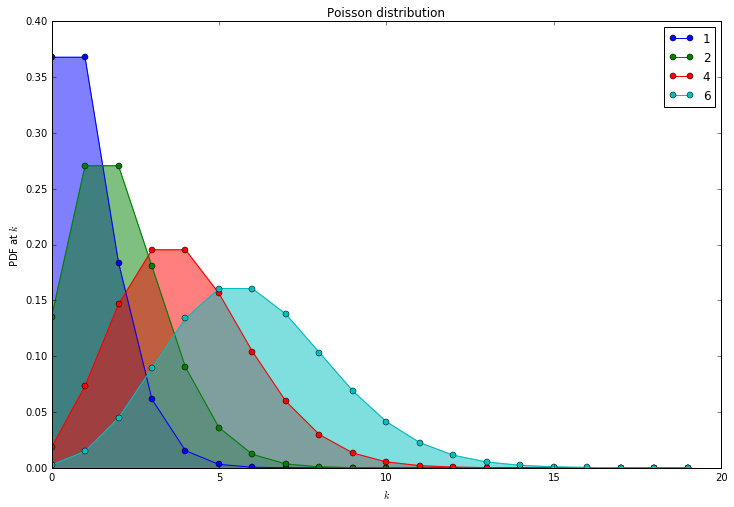

In [42]:
k = np.arange(20)
plt.figure(figsize=(12,8))
for i, lambda_ in enumerate([1, 2, 4, 6]):
    plt.plot(k, poisson.pmf(k, lambda_), '-o', label=lambda_, color=colors[i])
    plt.fill_between(k, poisson.pmf(k, lambda_), color=colors[i], alpha=0.5)
    plt.legend()
plt.title("Poisson distribution")
plt.ylabel("PDF at $k$")
plt.xlabel("$k$")

## Continuous Random Variables

The difficulty with continuous random variables is that you can’t find the probability of the exact event. The problem is that every value of the random variate has length 0, but if you add enough values together you have something with positive length. The usual way around this difficulty, is to define probabilities for intervals.

### Uniform distribution 

The uniform distribution over an interval $[a, b]$ can be used to describe our state of knowledge about random variable known to be within this interval, if nothing else is known about them.
We say that $X$ is a uniform random variable on the interval $[a, b]$,
and write:
$$
x|a,b \sim U(x|a,b) = 
\begin{cases}
\frac{1}{b - a},&\mbox{if}\;x\in[a,b],\\
0,&\mbox{otherwise}.
\end{cases}
$$

You can play with it using [scipy.stats](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform):

In [60]:
X = st.uniform(0, 1)
X.rvs(10)

array([ 0.5334961 ,  0.16581931,  0.78658391,  0.85022527,  0.10600555,
        0.76270302,  0.43222264,  0.9725804 ,  0.937761  ,  0.16955123])

Let's take a large sample and draw the histogram:

(array([ 1.12835309,  0.8563394 ,  0.93693605,  0.93693605,  1.10820393,
         1.09812935,  1.12835309,  0.84626482,  1.09812935,  0.93693605]),
 array([  5.81261786e-04,   9.98409715e-02,   1.99100681e-01,
          2.98360391e-01,   3.97620101e-01,   4.96879810e-01,
          5.96139520e-01,   6.95399230e-01,   7.94658939e-01,
          8.93918649e-01,   9.93178359e-01]),
 <a list of 1 Patch objects>)

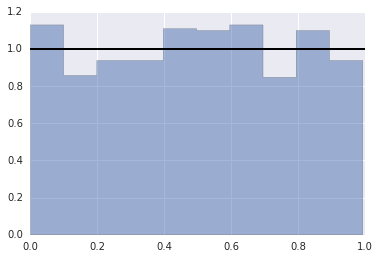

In [67]:
x = np.linspace(0, 1, 100)
plt.plot(x, X.pdf(x), 'k-', lw=2)
plt.hist(X.rvs(1000), normed=True, histtype='stepfilled', alpha=0.5)

### The Alpha Distribution

The Alpha distribution is defined as:


$$ p_{\alpha}(x,a)=\frac{1}{x^2 \Phi(a) \sqrt{2 \pi}} exp(−\frac{1}{2} (\frac{a−1}{x})^2), \rm{with} \,\,  x>0, \, a>0 $$

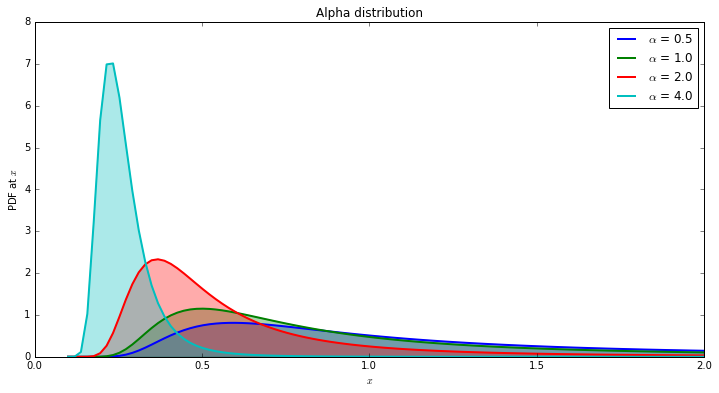

In [43]:
x = np.linspace(0.1, 2, 100)
alpha = scipy.stats.alpha
alphas = [0.5, 1, 2, 4]
plt.figure(figsize=(12,6))
for a,c in zip(alphas,colors):
    
    label=r"$\alpha$ = {0:.1f}".format(a)
    plt.plot(x, alpha.pdf(x, a), lw=2, 
              color=c, label=label)
    plt.fill_between(x, alpha.pdf(x, a), color=c, alpha = .33)
    

plt.ylabel("PDF at $x$")
plt.xlabel("$x$")
plt.title("Alpha distribution")

q=plt.legend()

### The Beta Distribution

The Beta distribution is suitable for parameters that take values in $[0,1]$, but not necessarily in a uniform manner. 
The $\theta$ describing the probability of success in a Bernoulli trial was such a parameter. Our state of knowledge about it, can thus be represented using a Beta distribution.
The definition of the Beta distribution is conditional on two parameters
$a, b > 0$ that control its shape:
$$
\theta|a,b \sim \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1},
$$
where $\Gamma(\cdot)$ is the [Gamma function](https://en.wikipedia.org/wiki/Gamma_function).

In [31]:
X = st.beta(0.5, 0.9)
X.rvs(10)

array([ 0.33056629,  0.06700566,  0.04428954,  0.29530305,  0.00782942,
        0.12223543,  0.42371213,  0.59795359,  0.34854207,  0.91005644])

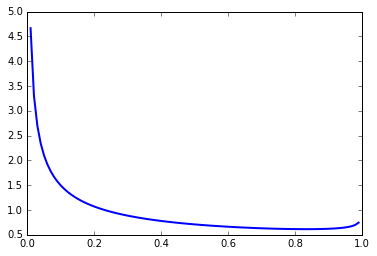

In [3]:
def visualize_beta(a=0.5, b=0.9):
    X = st.beta(a, b)
    x = np.linspace(0, 1, 100)
    plt.plot(x, X.pdf(x), lw=2)
interactive(visualize_beta, a=(0.001, 100., 0.1), b=(0.001, 100., 0.1))

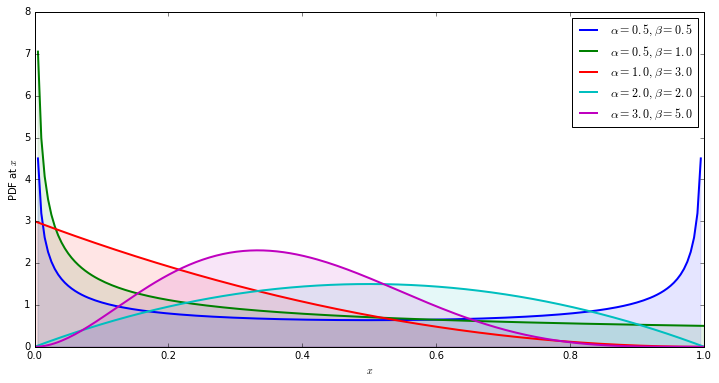

In [44]:
beta = scipy.stats.beta
x = np.linspace(0,1, num=200)


fig = plt.figure(figsize=(12,6))
for a, b, c in zip([0.5, 0.5, 1, 2, 3], [0.5, 1, 3, 2, 5], colors):
    plt.plot(x, beta.pdf(x, a, b), lw=2, 
             c=c, label = r"$\alpha = {0:.1f}, \beta={1:.1f}$".format(a, b))
    plt.fill_between(x, beta.pdf(x, a, b), color=c, alpha = .1)
    
    
plt.legend(loc=0)
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")

### Questions
Let's say that you wish to analyze a coin flipping experiment and you do not know what the probability of getting heads, $\theta$, is. Therefore, you have to model $\theta$ as a random variable and assign a probability density to it. Since $\theta$ takes values between 0 and 1, you decide to assign a Beta distribution to it. Using the interactive tool above, try to find parameters $a$ and $b$ that describe the following states of knowledge:
+ The coin is fair.
+ The coin is slightly biased towards heads.
+ The coin is slightly biased towards tails.
+ The coin is definitely biased towards heads.
+ The coin is definitely biased towards tails.
+ The coin is definitely biased, but I don't know how.

### Exponential Random Variable

The [Exponential Distribution](https://en.wikipedia.org/wiki/Exponential_distribution) is suitable for random variables that describe the time between events in a process in which events occure continuously and at a constant rate. In general, it can be used for random variables that are positive as a special case of the [Gamma Distribution](https://en.wikipedia.org/wiki/Gamma_distribution).
We write:
$$
x|r\sim \mathcal{E}(x|r) = r e^{-r x},
$$
where $r>0$ is known as the *rate parameter*.

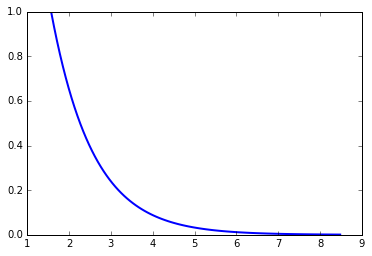

In [13]:
def visualize_exponential(r=0.5):
    X = st.expon(r)
    x = np.linspace(X.ppf(0.001), X.ppf(0.999), 100)
    plt.plot(x, X.pdf(x), lw=2)
interactive(visualize_exponential, r=(0.001, 10, 0.01))

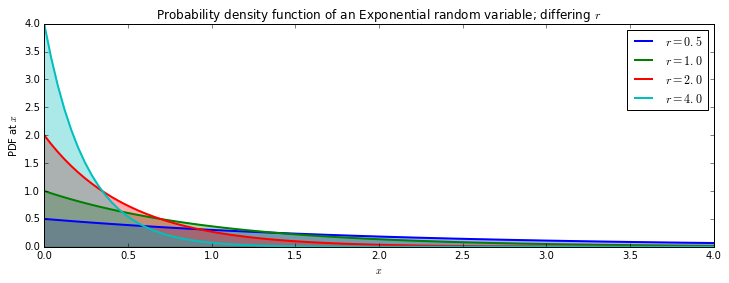

In [46]:
x = np.linspace(0,4, 100)
expo = scipy.stats.expon
r = [0.5, 1, 2, 4]
plt.figure(figsize=(12,4))
for l,c in zip(r,colors):
    plt.plot(x, expo.pdf(x, scale=1./l), lw=2, 
                color=c, label = "$r = %.1f$"%l)
    plt.fill_between(x, expo.pdf(x, scale=1./l), color=c, alpha = .33)
    
plt.legend()
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")
plt.title("Probability density function of an Exponential random variable;\
 differing $r$");

### The Gaussian (Normal) Distribution

The Gaussian distribution is probably the most important of all distributions due to the Central Limit Theorem which states that, given certain conditions, the arithmetic mean of a sufficiently large number of iterates of independent random variables, each with a well-defined expected value and well-defined variance, will be approximately normally distributed. 

The Gaussian distribution is suitable for continuous random variables with known mean, $\mu$, and variance, $\sigma^2$, with no other restrictions posed on them.
We write:
$$
x|\mu, \sigma\sim \mathcal{N}(x|\mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}.
$$

Of course:
$$
\mathbb{E}[X|\mu,\sigma] = \mu,
$$
and
$$
\mathbb{V}[X|\mu,\sigma] = \sigma^2.
$$

In [14]:
X = st.norm(loc=0.5, scale=2.)

In [15]:
print X.rvs(10)

[-1.68463188  1.33883161 -3.14608785 -2.63598839  1.49838221 -1.30642921
 -3.243815    1.28607881 -1.30512498  0.64169062]


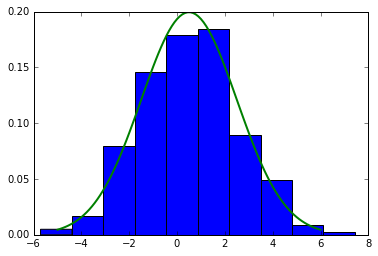

In [16]:
plt.hist(X.rvs(2000), normed=True)
x = np.linspace(-5, 6, 100)
plt.plot(x, X.pdf(x), lw=2)

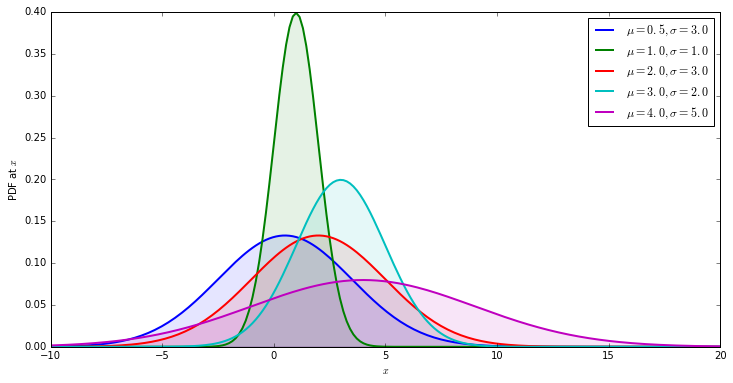

In [45]:
normal = scipy.stats.norm
x = np.linspace(-10,20, num=200)


fig = plt.figure(figsize=(12,6))
for mu, sigma, c in zip([0.5, 1, 2, 3, 4], [3, 1, 3, 2, 5], colors):
    plt.plot(x, normal.pdf(x, mu, sigma), lw=2, 
             c=c, label = r"$\mu = {0:.1f}, \sigma={1:.1f}$".format(mu, sigma))
    plt.fill_between(x, normal.pdf(x, mu, sigma), color=c, alpha = .1)
    
    
plt.legend(loc=0)
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")

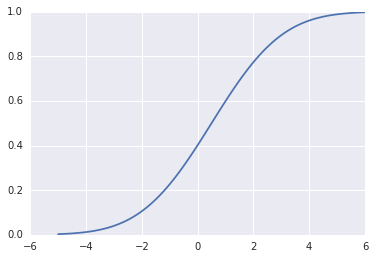

In [80]:
# The CDF of the Gaussian
plt.plot(x, X.cdf(x))

### The Central Limit Theorem

The sum of $N$ independent and identically distributed (iid) random variables starts to look like a Gaussian for large $N$.
Mathematically, let $X_1,X_2,\dots$ be iid random variables with mean $\mu$ and variance $\sigma^2$ and define the running average of the random variables:
$$
S_N = \frac{X_1+\dots+X_N}{N}.
$$
The Central Limit Theorem (CLT), states that:
$$
S_N \sim \mathcal{N}(S_N|\mu, \frac{\sigma^2}{N}),
$$
for large $N$.
We are not going to prove this, but let us test it numerically:

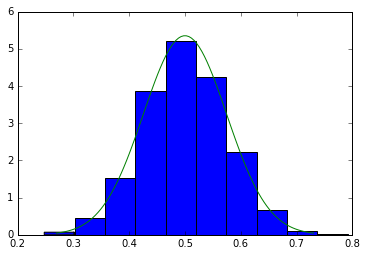

In [17]:
# Testing CLT for iid uniform random variables:
def visualize_uniform_clt(N=2):
    X = st.uniform()
    mu = X.mean()
    sigma = X.std()
    x = X.rvs((N, 10000))
    s = x.mean(axis=0)
    S_N_approx = st.norm(loc=mu, scale=sigma / np.sqrt(N))
    plt.hist(s, normed=True)
    xx = np.linspace(S_N_approx.ppf(0.001), S_N_approx.ppf(0.999), 100)
    plt.plot(xx, S_N_approx.pdf(xx))
interactive(visualize_uniform_clt, N=(1, 10000, 1))

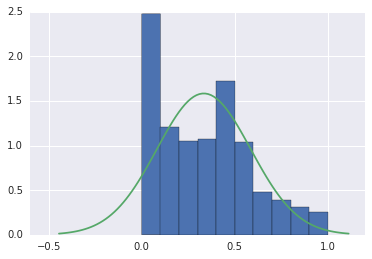

In [102]:
# Testing CLT for iid beta random variables:
def visualize_beta_clt(N=2, a=0.25, b=0.5):
    X = st.beta(a, b)
    mu = X.mean()
    sigma = X.std()
    x = X.rvs((N, 10000))
    s = x.mean(axis=0)
    S_N_approx = st.norm(loc=mu, scale=sigma / np.sqrt(N))
    plt.hist(s, normed=True)
    xx = np.linspace(S_N_approx.ppf(0.001), S_N_approx.ppf(0.999), 100)
    plt.plot(xx, S_N_approx.pdf(xx))
interactive(visualize_beta_clt, N=(1, 10000, 1), a=(0.01, 10, 0.01), b=(0.01, 10, 0.01))

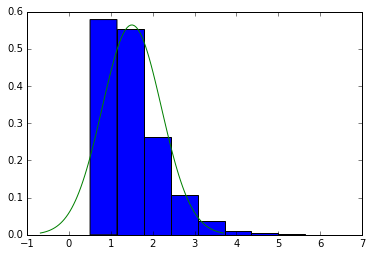

In [18]:
# Testing CLT for iid exponential random variables:
def visualize_exponential_clt(N=2, r=0.5):
    X = st.expon(r)
    mu = X.mean()
    sigma = X.std()
    x = X.rvs((N, 10000))
    s = x.mean(axis=0)
    S_N_approx = st.norm(loc=mu, scale=sigma / np.sqrt(N))
    plt.hist(s, normed=True)
    xx = np.linspace(S_N_approx.ppf(0.001), S_N_approx.ppf(0.999), 100)
    plt.plot(xx, S_N_approx.pdf(xx))
interactive(visualize_exponential_clt, N=(1, 10000, 1), a=(0.01, 10, 0.01), b=(0.01, 10, 0.01))

## Mutlivariate random variates

In [18]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import bernoulli, poisson, binom

from collections import defaultdict
import json

import numpy as np
import scipy as sp
import copy
import pandas as pd

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

from matplotlib.colors import ListedColormap
dark2_cmap=ListedColormap(dark2_colors)


In [17]:
df=pd.read_csv("02_heights_weights_genders.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## Joint, marginal and conditional

The joint distribution is given by the 2D histogram as 


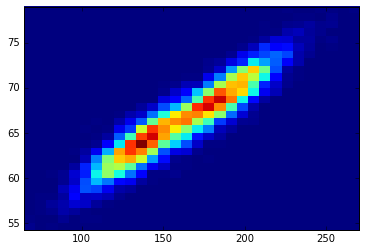

In [18]:
q,  xedges, yedges, Image=plt.hist2d(df.Weight, df.Height, 30)

Lets look at the actual distribution

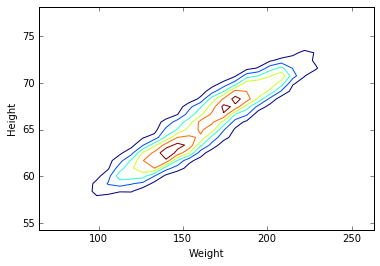

In [19]:
img=plt.contour(xedges[0:-1], yedges[0:-1], q)
plt.xlabel('Weight')
plt.ylabel('Height')

How about the marginal? This is as simple as taking the histogram ignoring one of the dimensions. For example marginalizing over Height take the histogram of Weight as:

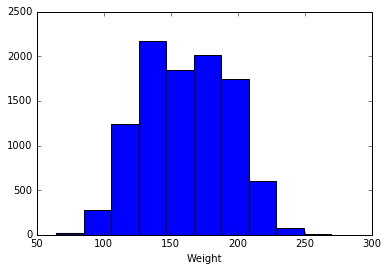

In [20]:
img=plt.hist(df.Weight)
plt.xlabel('Weight')

Finally how about conditional? Lets assume we want the probability distribution for Weight given Height= 65? As explained above with continous variables we should use intervals rather than exact values. Say we want the conditional given Height larger than 65. 

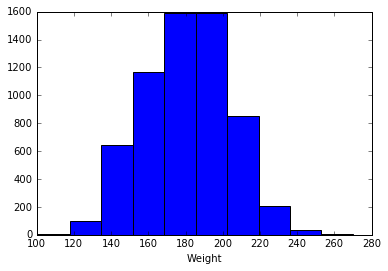

In [34]:
plt.hist( df.Weight[ (df.Height > 65)])
plt.xlabel('Weight')

# Regression

This is based in part on chapter 3 of "The elements of statistical learning" by Hastie, Tibshirani and Friedman (get full pdf <a href ="http://statweb.stanford.edu/~tibs/ElemStatLearn/">here</a>).

Say we have measurement $\bf{y}$ where bold-face indicates that we are talking about a measurment vector, say of length $N$. This measurement is a response to some inputs: $(x_1,x_2,...x_p)$. Each one of the $x_i$ vectors also has $N$ elements. Think of the $X$ as representing different input. 
A linear model assumes that the expected value of y given a specific input X can be expressed as a linear sum of the $x_i$. In other words the expectation of Y given X, E(Y|X) is linear in the inputs. All this means is that in the noise-less case y is a function of the inputs, f(x), such that there exist $\beta_i$ which satisfy:
$$f(x)=\beta_0+\beta_1 x_1+\beta_2 \, x_2+...+ \beta_p \, x_p $$

Notice that bivariate linear regression,  is simply a subset of this, with $N=1$.

Lets look at this simple case

In [36]:
def linear_function(x,a,b):
    """ 
    A linear function
    
    Parameters
    ----------
    x : ndarray
        Input variable
    
    a : float
        offset parameter
    
    b : float 
        slope parameter
    """
    return a + b * x 

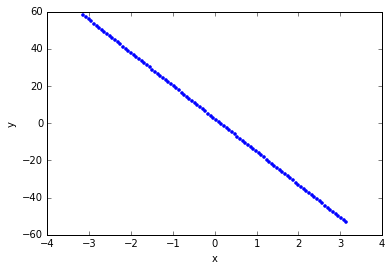

In [37]:
N = 100
x = np.linspace(-np.pi, np.pi, N)

a = np.random.randn() * 10
b = np.random.randn() * 10
y = linear_function(x, a, b)

fig, ax = plt.subplots(1)
ax.plot(x, y, '.')
ax.set_xlabel('x')
ax.set_ylabel('y')

And this linear relationship holds, even when the input is not a linear function

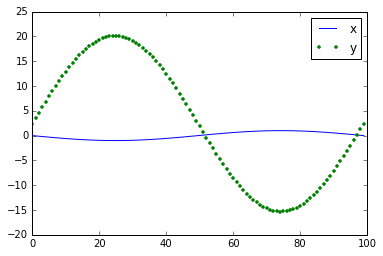

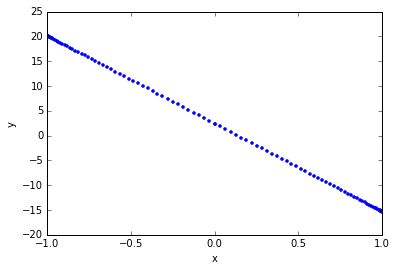

In [56]:
t = np.linspace(-np.pi, np.pi, N)
x = np.sin(t)
fig, ax = plt.subplots(1)
ax.plot(x, label='x')
y = linear_function(x, a, b)
ax.plot(y, '.', label='y')
plt.legend()
fig, ax = plt.subplots(1)
ax.plot(x, y, '.')
ax.set_xlabel('x')
ax.set_ylabel('y')

## Multi-linear regression:

This works the same if we have p inputs, where we choose p=5. For example, let's consider an output which is a linear combination of p sine waves. To account for $\beta_0$, we make sure that the first column is all 1's:

In [39]:

p = 5  # Number of inputs

# Preallocate a matrix (make it a matrix of ones to account for beta_0):
X = np.ones((N, p)) 
for ii in range(1, p):
    X[:, ii] = np.sin((ii+1)*t)

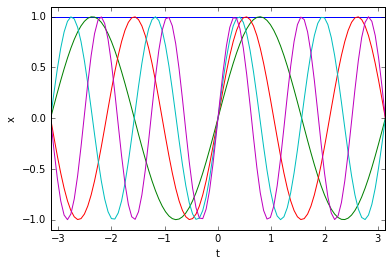

In [40]:
ig, ax = plt.subplots(1) 
ax.plot(t,X)
ax.set_ylim([-1.1, 1.1])
ax.set_xlim([-np.pi, np.pi])
ax.set_xlabel('t')
ax.set_ylabel('x')

And now $f(x)$ should include all coefficients

In [41]:
def linear_model(X, beta):
    """ 
    The linear model

    Parameters
    ----------
    X : 2d array
        The design matrix : a matrix of regressors
    
    beta : 1d array 
        Model coefficients
    """ 
    return np.dot(X, beta)

Where np.dot is a matrix multiplication:
$$\bf{X} \beta=\beta_0+\beta_1 x_1+\beta_2 x_2+...+\beta_p\, x_p$$

We choose a set of random $\beta$ coefficients and generate $f(x)$

(-3.141592653589793, 3.141592653589793)

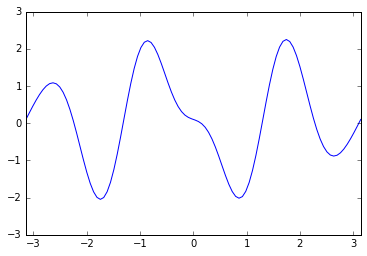

In [42]:
beta = np.random.randn(p)
f = linear_model(X, beta)
fig, ax = plt.subplots(1)
ax.plot(t, f)
ax.set_xlim([-np.pi, np.pi])

## Noise

Lets now assume there is some noise such as $\bf{y}=\bf{f(x)}+\epsilon$ and lets assume the noise is normally distributed with zero mean. 

In [44]:
y = f + 0.1*np.random.randn(*f.shape)

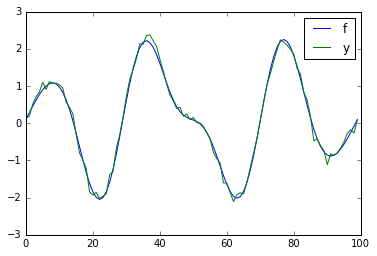

In [45]:
fig, ax = plt.subplots(1)
ax.plot(f, label='f')
ax.plot(y, label='y')
plt.legend()

## Solve the linear model

This usually means finding an estimate of the $\beta$ coefficients that generated the data we observed. We are looking for a procedure to estimate the coefficients (all parameter estimates will be designated with a hat $\hat{\beta}$

A 'good' estimate of these coefficients would produce an estimate of the output, $\hat{y}$, which would be close to the measured data points.
Where:
$$\bf{\hat{y}=X \hat{\beta}}$$

A way to define this is by requiring the residual sum of squares to be small, where the residuals are:
$$ \bf{y−\hat{y}}$$
and the residual sum of squares (or RSS) is:

$$RSS=\sum^{N}_i (y_i−\hat{y_i})^2$$


Since $\hat{y}$ is a function of $\beta$, we can think of RSS as a function of $\beta$ and we want to optimize it with respect to a choice of the elements of $\beta$. In other words to find a minimum of RSS with respect to $\beta$.
Mathematically speaking, we want to find a value of $\hat{\beta}$ for which the first derivative of RSS with respect to $\beta$ is 0

To find the derivative, we re-write RSS in the following way:

$$RSS(\beta)=(\bf{y−X} \beta)^T(\bf{y−X}\beta)$$

The derivative of this function is 
$$ \frac{d \, RSS}{d \beta}=−2\bf{X^T(y−X} \beta)$$
Setting the first derivative to 0 and dividing both sides by 2, we obtain
$$ \bf{X^T y= X^T X} \beta $$

If $\bf{X}$ is 'full rank', then $\bf{X^T X}$ is positive definite and it can be inverted and 

$$ \hat{\beta} = (\bf{X^T \, X)^{-1} X^T y} $$

which is also called ordinary least square

In [46]:
import scipy.linalg as la
def ols(X):
    """
    The matrix which solves the OLS regression problem for full-rank X
    """
    return np.dot(la.pinv(np.dot(X.T, X)), X.T)

Compute $\hat{\beta}$ using the function above 

In [47]:
beta_hat = np.dot(ols(X), y)

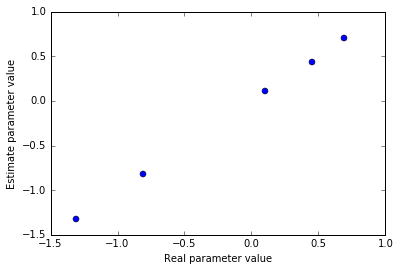

In [48]:
# estimated betas vs read betas

plt.plot(beta, beta_hat, 'o')
plt.xlabel('Real parameter value')
plt.ylabel('Estimate parameter value')

And using these estimates $\hat{\beta}$ we can now estimate the $\bf{\hat{y}}$

$$ \bf{\hat{y}=X \hat{\beta} }$$

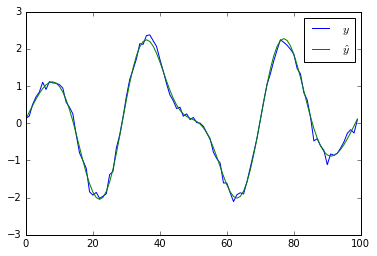

In [49]:
y_hat = np.dot(X, beta_hat)
fig, ax = plt.subplots(1)
ax.plot(y, label='$y$')
ax.plot(y_hat, label='$\hat{y}$')
plt.legend()

The "hat matrix", H is the matrix that does the actual transformation

In [50]:
H = np.dot(X, ols(X))
H.shape
y_hat = np.dot(H.T, y)

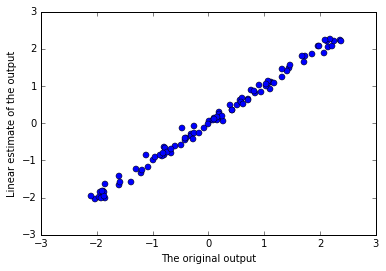

In [51]:
plt.plot(y, y_hat, 'o')
plt.xlabel('The original output') 
plt.ylabel('Linear estimate of the output')